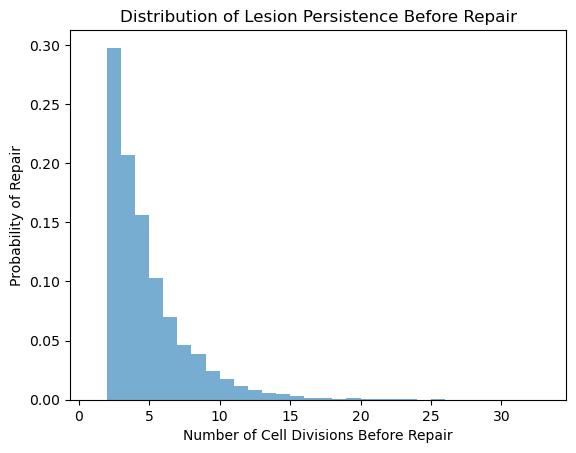

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_DNA_lesion_persistence(p, n_simulations=1000):
    persistence_duration = []
    
    for _ in range(n_simulations): 
        divisions = 1
        while True:
            divisions += 1
            if np.random.rand() < p:
                break
        persistence_duration.append(divisions)
    
    return persistence_duration

# Example usage:
p = 0.3  # Repair probability
results = simulate_DNA_lesion_persistence(p, 10000)

# Plot
plt.hist(results, bins=range(1, max(results)+2), density=True, alpha=0.6)
plt.title("Distribution of Lesion Persistence Before Repair")
plt.xlabel("Number of Cell Divisions Before Repair")
plt.ylabel("Probability of Repair")
plt.show()

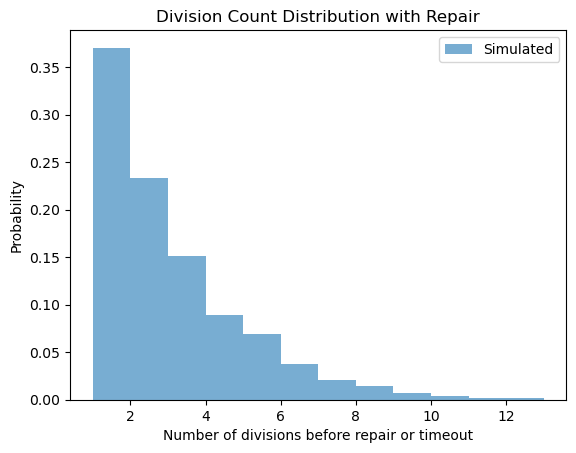

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5 # division rate (λ)
T= 10          # end time
rho = 0.3      # repair rate

# Exponential-based repair probability 
def repair_probability(rho, deltaT):
    return 1 - np.exp(-rho * deltaT)

# experiment: track divisions until repair or end time
def experiment_with_repair(mitRate, T, rho):
    t = 0
    nDivisions = 1
    
    while True:
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT #t+divisiontime
        
        if t > T:
            break  # end of time reached (stop limit exceeds)
        
        # Check for repair (Bernoulli trial)
        if rng.uniform() < repair_probability(rho, deltaT): #Generates a random number between 0 and 1, “With this probability, the repair occurs.”
            
            break
        
        nDivisions += 1  # no repair, continue
    
    return nDivisions

# Run trials
experimentResults = [experiment_with_repair(mitRate, T, rho) for _ in range(nTrials)] #Repeat the division + repair process nTrials times. 

# Plot histogram
plt.hist(experimentResults, bins=range(1, max(experimentResults)+1), density=True, alpha=0.6, label='Simulated')


plt.xlabel("Number of divisions before repair or timeout")
plt.ylabel("Probability")
plt.title("Division Count Distribution with Repair")
plt.legend()
plt.show()


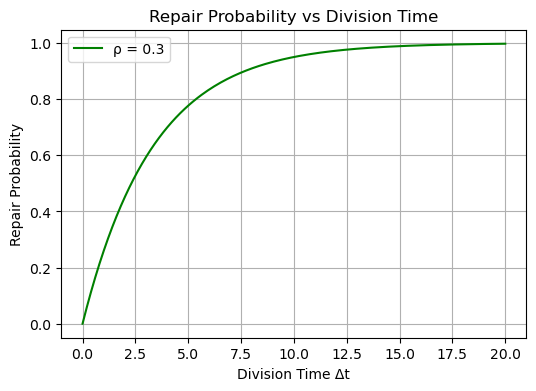

In [6]:
# Time range (possible division times)
deltaT_range = np.linspace(0, 20, 200)

# Corresponding repair probabilities
repair_probs = [repair_probability(rho, deltaT) for deltaT in deltaT_range]

plt.figure(figsize=(6, 4))
plt.plot(deltaT_range, repair_probs, label=f'ρ = {rho}', color='green')
plt.xlabel("Division Time Δt")
plt.ylabel("Repair Probability")
plt.title("Repair Probability vs Division Time")
plt.grid(True)
plt.legend()
plt.show()


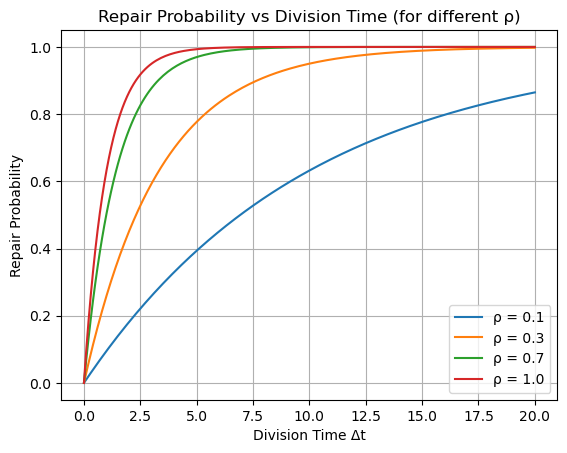

In [7]:
rhos = [0.1, 0.3, 0.7, 1.0]
for rho_val in rhos:
    repair_probs = [repair_probability(rho_val, dt) for dt in deltaT_range]
    plt.plot(deltaT_range, repair_probs, label=f'ρ = {rho_val}')

plt.xlabel("Division Time Δt")
plt.ylabel("Repair Probability")
plt.title("Repair Probability vs Division Time (for different ρ)")
plt.legend()
plt.grid(True)
plt.show()


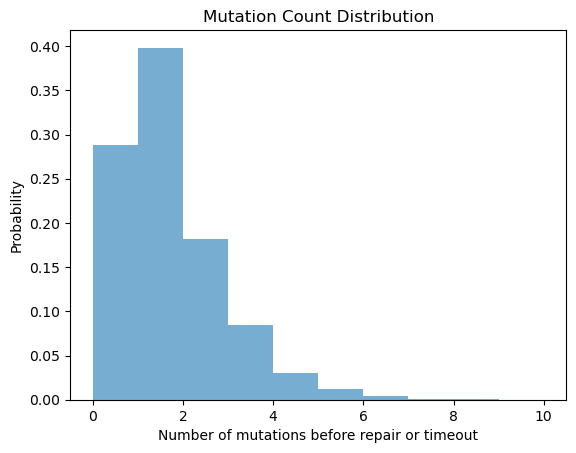

In [27]:
def experiment_with_mutation_tracking(mitRate, T, rho, mutation_prob=0.5):
    t = 0
    nDivisions = 1
    mutations = 0
    
    while True:
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        
        if t > T:
            break
        
        # Potential mutation occurs
        if rng.uniform() < mutation_prob:
            mutations += 1
        
        # Repair attempt
        if rng.uniform() < repair_probability(rho, deltaT):
            break
        
        nDivisions += 1
    
    return mutations


mutationResults = [experiment_with_mutation_tracking(mitRate, T, rho) for _ in range(nTrials)]
plt.hist(mutationResults, bins=range(max(mutationResults)+2), density=True, alpha=0.6)
plt.xlabel("Number of mutations before repair or timeout")
plt.ylabel("Probability")
plt.title("Mutation Count Distribution")
plt.show()